In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.set_option('display.max_columns', None)

In [ ]:
from IPython.display import display

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/DATASET NBA/NBAGAMES.csv", sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (58,64,65,68,79,93,96,114) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df.describe()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_SEQUENCE,GAME_STATUS_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,WH_STATUS,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,ATTENDANCE,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
count,6.244800e+04,62448.000000,6.244800e+04,62448.000000,62430.000000,44586.000000,44548.000000,46791.000000,41527.000000,41142.000000,62427.000000,59412.000000,59409.000000,41240.000000,41171.000000,44340.000000,44204.000000,41323.000000,41532.000000,41503.000000,59512.000000,62448.000000,62448.000000,62448.000000,6.244800e+04,62448.000000,62433.000000,44587.000000,44550.000000,46791.000000,41527.000000,41240.000000,62433.000000,59415.000000,59414.000000,41240.000000,41172.000000,44344.000000,44207.000000,41323.000000,41533.000000,41502.000000,59519.000000,62448.000000,62448.000000,62448.000000,31318.000000,62448.000000,6.244800e+04,6.244800e+04,62448.000000,62448.000000,62015.0,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29292.000000,27318.000000,27022.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29393.000000,29292.000000,27318.000000,27022.000000,29393.0,56323.000000,61237.000000,61231.000000,61192.000000,61189.000000,31075.000000,29629.000000,29421.000000,29391.000000,10750.000000,10749.0,10749.0,10749.0,10749.0,10749.0,61950.000000,61241.000000,61231.000000,61192.000000,61193.000000,31075.000000,29629.000000,29421.000000,29391.000000,10750.000000,10749.0,10749.0,10749.0,10749.0,10749.0,6.178100e+04,6.178100e+04,61781.000000,6.178100e+04,61781.000000,62379.000000,62379.000000,62379.000000,62379.000000,62379.00000,62379.000000,62379.000000
mean,2.513506e+07,21991.655874,1.610613e+09,218.888147,39.956816,83.900305,0.467941,5.321152,16.547018,0.346580,20.841479,27.359153,0.754420,12.228952,31.214690,43.733897,23.946498,8.007720,5.351151,14.779606,22.464293,104.744011,3.704250,0.173632,1.610613e+09,218.887715,38.591242,83.669545,0.455125,5.237076,16.614010,0.336367,19.937998,26.262644,0.751627,11.795926,30.019139,42.052408,22.071346,7.865474,4.695784,15.192521,23.175490,101.039761,-3.704250,0.173632,4.434000,2.995692,1.610613e+09,1.610613e+09,1991.655874,4.057696,1.0,42.301160,13.514816,13.634063,13.119756,6.346919,5.355289,0.606165,14.434794,8.470130,14.739879,40.287143,13.067771,12.217501,9.872351,6.344810,5.353962,0.642364,14.737812,8.436049,15.478129,0.0,14543.309359,26.472019,26.036534,26.067362,25.985030,1.169204,0.164940,0.025424,0.009765,0.001581,0.0,0.0,0.0,0.0,0.0,104.716868,25.215656,25.027192,25.153435,25.506627,1.123733,0.161497,0.023861,0.009152,0.001488,0.0,0.0,0.0,0.0,0.0,2.522089e+07,1.6106

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Columns: 149 entries, GAME_ID to HISTORICAL_STATUS
dtypes: float64(100), int64(16), object(33)
memory usage: 71.0+ MB


In [ ]:
#### RESTRICTION DU DATASET AUX 10 DERNIERES ANNEES

In [ ]:
df_quarto = df.iloc[60304:,:] # choix arbitraire de selection de +/- 10 dernières années pour avoir des statistiques non dénuées de sens


In [ ]:
df_quarto.head()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,TEAM_CITY_AWAY,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,TEAM_CITY_NAME_HOME,TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,TEAM_CITY_NAME_AWAY,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_CITY,LAST_GAME_HOME_TEAM_NAME,LAST_GAME_HOME_TEAM_ABBREVIATION,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_CITY,LAST_GAME_VISITOR_TEAM_NAME,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
60304,21900002,22019,1610612746,LAC,LA Clippers,2019-10-22,LAC vs. LAL,W,240,42.0,81.0,0.519,11.0,31.0,0.355,17.0,24.0,0.708,11.0,34.0,45.0,24.0,8.0,5.0,14.0,25.0,112,10,1,1610612747,LAL,Los Angeles Lakers,LAL @ LAC,L,240,37.0,85.0,0.435,13.0,33.0,0.394,15.0,21.0,0.714,9.0,32.0,41.0,20.0,4.0,7.0,15.0,24.0,102,-10,1,2019-10-22T00:00:00,2.0,3,Final,20191022/LALLAC,1610612746,1610612747,2019,4.0,NaN,TNT,Q4 - TNT,1.0,LA,42.0,12.0,22.0,14.0,5.0,5.0,0.0,14.0,5.0,17.0,Los Angeles,40.0,6.0,5.0,11.0,5.0,5.0,1.0,15.0,9.0,25.0,0.0,"TUESDAY, OCTOBER 22, 2019",19068.0,2:28,LA,Clippers,1-0,22.0,40.0,23.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,Los Angeles,Lakers,0-1,25.0,29.0,31.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21801192.0,2019-04-05T00:00:00,1.610613e+09,LA,Clippers,LAC,117.0,1.610613e+09,Los Angeles,Lakers,LAL,122.0,2.0,2.0,Tied,1.0,1.0,1.0,1.0,0.0
60305,21900001,22019,1610612761,TOR,Toronto Raptors,2019-10-22,TOR vs. NOP,W,265,42.0,103.0,0.408,14.0,40.0,0.350,32.0,38.0,0.842,16.0,41.0,57.0,23.0,7.0,3.0,17.0,24.0,130,8,1,1610612740,NOP,New Orleans Pelicans,NOP @ TOR,L,265,43.0,102.0,0.422,19.0,45.0,0.422,17.0,20.0,0.850,16.0,37.0,53.0,30.0,4.0,9.0,19.0,34.0,122,-8,1,2019-10-22T00:00:00,1.0,3,Final,20191022/NOPTOR,1610612761,1610612740,2019,5.0,NaN,TNT,Q5 - TNT,1.0,Toronto,56.0,19.0,20.0,8.0,15.0,14.0,1.0,17.0,15.0,20.0,New Orleans,38.0,9.0,13.0,11.0,15.0,14.0,0.0,19.0,4.0,22.0,0.0,"TUESDAY, OCTOBER 22, 2019",20787.0,2:50,Toronto,Raptors,1-0,27.0,29.0,32.0,29.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,New Orleans,Pelicans,0-1,30.0,31.0,25.0,31.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21800983.0,2019-03-08T00:00:00,1.610613e+09,Toronto,Raptors,TOR,127.0,1.610613e+09,New Orleans,Pelicans,NOP,104.0,2.0,0.0,Toronto,1.0,1.0,1.0,1.0,0.0
60306,21900008,22019,1610612755,PHI,Philade

In [ ]:
# Quelques modifs Df

In [ ]:
df_quarto['GAME_DATE'] = pd.to_datetime(df_quarto['GAME_DATE'], format= '%Y/%m/%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
### df_quarto['GAME_TIME'] = pd.to_datetime(df_quarto['GAME_TIME']) #ko

In [ ]:
df_quarto['day_of_week'] = df_quarto['GAME_DATE'].dt.day_name ()
#df_quarto['day_of_week'] = df_quarto['GAME_DATE'].dt.weekday
#df['hour_of_day'] = df['GAME_TIME'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_quarto['WL_HOME'] = df_quarto['WL_HOME'].map({'W':1, 'L':0})

df_quarto['WL_AWAY'] = df_quarto['WL_AWAY'].map({'W':1, 'L':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_quarto.sample()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,TEAM_CITY_AWAY,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,TEAM_CITY_NAME_HOME,TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,TEAM_CITY_NAME_AWAY,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_CITY,LAST_GAME_HOME_TEAM_NAME,LAST_GAME_HOME_TEAM_ABBREVIATION,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_CITY,LAST_GAME_VISITOR_TEAM_NAME,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS,day_of_week
61462,22000100,22020,1610612740,NOP,New Orleans Pelicans,2021-01-04,NOP vs. IND,0.0,265,44.0,101.0,0.436,9.0,27.0,0.333,19.0,24.0,0.792,16.0,41.0,57.0,26.0,5.0,4.0,18.0,20.0,116,-2,1,1610612754,IND,Indiana Pacers,IND @ NOP,1.0,265,45.0,93.0,0.484,19.0,45.0,0.422,9.0,13.0,0.692,5.0,37.0,42.0,32.0,10.0,8.0,14.0,27.0,118,2,1,2021-01-04T00:00:00,8.0,3,Final,20210104/INDNOP,1610612740,1610612754,2020,5.0,NaN,NaN,Q5 -,1.0,New Orleans,60.0,22.0,9.0,10.0,20.0,11.0,0.0,18.0,10.0,22.0,Indiana,50.0,5.0,2.0,7.0,20.0,11.0,0.0,14.0,5.0,13.0,0.0,"MONDAY, JANUARY 4, 2021",NaN,2:25,New Orleans,Pelicans,4-3,24.0,27.0,26.0,29.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,Indiana,Pacers,5-2,26.0,27.0,26.0,27.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21900780.0,2020-02-08T00:00:00,1.610613e+09,New Orleans,Pelicans,NOP,124.0,1.610613e+09,Indiana,Pacers,IND,117.0,1.0,1.0,Tied,1.0,1.0,1.0,1.0,0.0,Monday


In [ ]:
df_quarto['TEAM_ABBREVIATION_HOME'].value_counts()

PHX    75
DAL    74
OKC    73
MEM    73
DEN    73
NOP    73
POR    73
IND    72
MIA    72
WAS    72
LAL    72
BOS    72
TOR    72
CLE    72
HOU    72
LAC    72
BKN    72
SAC    71
MIL    71
UTA    71
PHI    71
ORL    71
ATL    71
NYK    70
SAS    70
GSW    70
CHI    70
DET    69
MIN    68
CHA    67
Name: TEAM_ABBREVIATION_HOME, dtype: int64

In [ ]:
df_quarto['TEAM_NAME_HOME'].value_counts()

Phoenix Suns              75
Dallas Mavericks          74
Memphis Grizzlies         73
Portland Trail Blazers    73
Denver Nuggets            73
Oklahoma City Thunder     73
New Orleans Pelicans      73
Los Angeles Lakers        72
Cleveland Cavaliers       72
Brooklyn Nets             72
Houston Rockets           72
Washington Wizards        72
Boston Celtics            72
Toronto Raptors           72
LA Clippers               72
Indiana Pacers            72
Miami Heat                72
Philadelphia 76ers        71
Milwaukee Bucks           71
Orlando Magic             71
Utah Jazz                 71
Atlanta Hawks             71
Sacramento Kings          71
Chicago Bulls             70
San Antonio Spurs         70
New York Knicks           70
Golden State Warriors     70
Detroit Pistons           69
Minnesota Timberwolves    68
Charlotte Hornets         67
Name: TEAM_NAME_HOME, dtype: int64

In [ ]:
df_quarto['TEAM_NAME_HOME'].unique()

array(['LA Clippers', 'Toronto Raptors', 'Philadelphia 76ers',
       'San Antonio Spurs', 'Phoenix Suns', 'Brooklyn Nets',
       'Orlando Magic', 'Miami Heat', 'Portland Trail Blazers',
       'Utah Jazz', 'Indiana Pacers', 'Dallas Mavericks',
       'Charlotte Hornets', 'Golden State Warriors', 'Houston Rockets',
       'Detroit Pistons', 'Los Angeles Lakers', 'Boston Celtics',
       'Sacramento Kings', 'Denver Nuggets', 'Oklahoma City Thunder',
       'Memphis Grizzlies', 'New Orleans Pelicans', 'Chicago Bulls',
       'New York Knicks', 'Cleveland Cavaliers', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Minnesota Timberwolves', 'Washington Wizards'],
      dtype=object)

In [ ]:
df_quarto.isna().sum()

GAME_ID                                0
SEASON_ID                              0
TEAM_ID_HOME                           0
TEAM_ABBREVIATION_HOME                 0
TEAM_NAME_HOME                         0
GAME_DATE                              0
MATCHUP_HOME                           0
WL_HOME                               40
MIN_HOME                               0
FGM_HOME                               0
FGA_HOME                               0
FG_PCT_HOME                            0
FG3M_HOME                              0
FG3A_HOME                              0
FG3_PCT_HOME                           0
FTM_HOME                               0
FTA_HOME                               0
FT_PCT_HOME                            0
OREB_HOME                              0
DREB_HOME                              0
REB_HOME                               0
AST_HOME                               0
STL_HOME                               0
BLK_HOME                               0
TOV_HOME        

In [ ]:
# REMPLACEMENT DES VALEURS MANQUANTES NAN DE TYPE NUMERIC PAR LEUR MOYENNE
num_column=[col for col in df_quarto.columns if df_quarto[col].dtype in ['int64','float64']]

In [ ]:
column_means = df_quarto[num_column]. mean()
for col in df_quarto:
  df_quarto = df_quarto.fillna(column_means)

In [ ]:
df_quarto = df_quarto.drop(['LIVE_PC_TIME','NATL_TV_BROADCASTER_ABBREVIATION'], axis=1)

In [ ]:
df_quarto.isna().sum()

GAME_ID                             0
SEASON_ID                           0
TEAM_ID_HOME                        0
TEAM_ABBREVIATION_HOME              0
TEAM_NAME_HOME                      0
GAME_DATE                           0
MATCHUP_HOME                        0
WL_HOME                             0
MIN_HOME                            0
FGM_HOME                            0
FGA_HOME                            0
FG_PCT_HOME                         0
FG3M_HOME                           0
FG3A_HOME                           0
FG3_PCT_HOME                        0
FTM_HOME                            0
FTA_HOME                            0
FT_PCT_HOME                         0
OREB_HOME                           0
DREB_HOME                           0
REB_HOME                            0
AST_HOME                            0
STL_HOME                            0
BLK_HOME                            0
TOV_HOME                            0
PF_HOME                             0
PTS_HOME    

In [ ]:
df_quarto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 60304 to 62447
Columns: 148 entries, GAME_ID to day_of_week
dtypes: datetime64[ns](1), float64(102), int64(16), object(29)
memory usage: 2.4+ MB


In [ ]:
# Nettoyage des lignes manquantes (données manquantes object)
df_quarto = df_quarto.dropna(axis=0)

In [ ]:
df_quarto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 60304 to 62447
Columns: 148 entries, GAME_ID to day_of_week
dtypes: datetime64[ns](1), float64(102), int64(16), object(29)
memory usage: 2.4+ MB


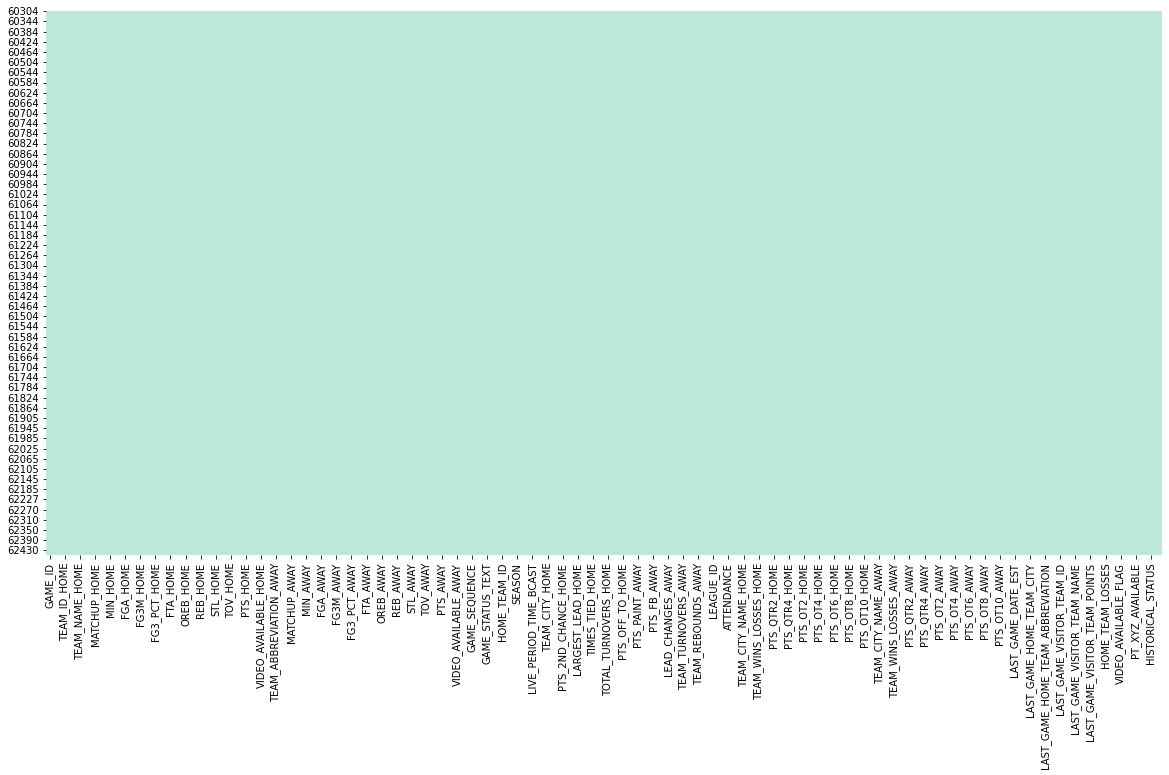

In [ ]:
plt.figure(figsize=(20,10))
sns.color_palette("crest", as_cmap=True)
sns.heatmap(df_quarto.notna(), cmap="icefire", center = 10.0, cbar=False);

In [ ]:
# SCREENING PAR TEAMS SUR LES 10 DERNIERES ANNEES

# WASHINGTON WIZARDS

In [ ]:
df_WAS= df_quarto[df_quarto['TEAM_ABBREVIATION_HOME']=='WAS']

In [ ]:
df_WAS.head()

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME,TEAM_CITY_AWAY,PTS_PAINT_AWAY,PTS_2ND_CHANCE_AWAY,PTS_FB_AWAY,LARGEST_LEAD_AWAY,LEAD_CHANGES_AWAY,TIMES_TIED_AWAY,TEAM_TURNOVERS_AWAY,TOTAL_TURNOVERS_AWAY,TEAM_REBOUNDS_AWAY,PTS_OFF_TO_AWAY,LEAGUE_ID,GAME_DATE_DAY,ATTENDANCE,GAME_TIME,TEAM_CITY_NAME_HOME,TEAM_NICKNAME_HOME,TEAM_WINS_LOSSES_HOME,PTS_QTR1_HOME,PTS_QTR2_HOME,PTS_QTR3_HOME,PTS_QTR4_HOME,PTS_OT1_HOME,PTS_OT2_HOME,PTS_OT3_HOME,PTS_OT4_HOME,PTS_OT5_HOME,PTS_OT6_HOME,PTS_OT7_HOME,PTS_OT8_HOME,PTS_OT9_HOME,PTS_OT10_HOME,PTS_HOME_y,TEAM_CITY_NAME_AWAY,TEAM_NICKNAME_AWAY,TEAM_WINS_LOSSES_AWAY,PTS_QTR1_AWAY,PTS_QTR2_AWAY,PTS_QTR3_AWAY,PTS_QTR4_AWAY,PTS_OT1_AWAY,PTS_OT2_AWAY,PTS_OT3_AWAY,PTS_OT4_AWAY,PTS_OT5_AWAY,PTS_OT6_AWAY,PTS_OT7_AWAY,PTS_OT8_AWAY,PTS_OT9_AWAY,PTS_OT10_AWAY,LAST_GAME_ID,LAST_GAME_DATE_EST,LAST_GAME_HOME_TEAM_ID,LAST_GAME_HOME_TEAM_CITY,LAST_GAME_HOME_TEAM_NAME,LAST_GAME_HOME_TEAM_ABBREVIATION,LAST_GAME_HOME_TEAM_POINTS,LAST_GAME_VISITOR_TEAM_ID,LAST_GAME_VISITOR_TEAM_CITY,LAST_GAME_VISITOR_TEAM_NAME,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS,day_of_week
60366,21900061,22019,1610612764,WAS,Washington Wizards,2019-10-30,WAS vs. HOU,0.0,240,57.0,91.0,0.626,20.0,36.0,0.556,24.0,29.0,0.828,11.0,29.0,40.0,31.0,6.0,4.0,19.0,27.0,158,-1,1,1610612745,HOU,Houston Rockets,HOU @ WAS,1.0,240,55.0,103.0,0.534,23.0,54.0,0.426,26.0,33.0,0.788,19.0,25.0,44.0,34.0,10.0,5.0,13.0,24.0,159,1,1,2019-10-30T00:00:00,7.0,3,Final,20191030/HOUWAS,1610612764,1610612745,2019,4.0,Q4 -,1.0,Washington,54.0,11.0,9.0,12.0,20.0,10.0,0.0,19.0,6.0,26.0,Houston,60.0,26.0,21.0,10.0,20.0,10.0,0.0,13.0,4.0,14.0,0.0,"WEDNESDAY, OCTOBER 30, 2019",20476.0,2:31,Washington,Wizards,1-3,34.0,43.0,40.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0,Houston,Rockets,3-1,35.0,41.0,35.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21800461.0,2018-12-19T00:00:00,1.610613e+09,Washington,Wizards,WAS,118.0,1.610613e+09,Houston,Rockets,HOU,136.0,0.0,1.0,Houston,1.0,1.0,1.0,1.0,0.0,Wednesday
60385,21900080,22019,1610612764,WAS,Washington Wizards,2019-11-02,WAS vs. MIN,0.0,240,37.0,95.0,0.389,12.0,35.0,0.343,23.0,27.0,0.852,8.0,31.0,39.0,21.0,11.0,4.0,17.0,18.0,109,-22,1,1610612750,MIN,Minnesota Timberwolves,MIN @ WAS,1.0,240,51.0,94.0,0.543,17.0,39.0,0.436,12.0,17.0,0.706,3.0,44.0,47.0,33.0,9.0,10.0,22.0,23.0,131,22,1,2019-11-02T00:00:00,4.0,3,Final,20191102/MINWAS,1610612764,1610612750,2019,4.0,Q4 -,1.0,Washington,24.0,9.0,8.0,0.0,0.0,0.0,0.0,17.0,9.0,20.0,Minnesota,56.0,13.0,16.0,34.0,0.0,0.0,1.0,22.0,15.0,22.0,0.0,"SATURDAY, NOVEMBER 2, 2019",15150.0,2:07,Washington,Wizards,1-4,34.0,22.0,16.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,Minnesota,Timberwolves,4-1,42.0,28.0,36.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21800988.0,2019-03-09T00:00:00,1.610613e+09,Washington,Wizards,WAS,130.0,1.610613e+09,Minnesota,Timberwolves,MIN,135.0,1.0,1.0,Tied,1.0,1.0,1.0,1.0,0.0,Saturday
60398,21900091,22019,1610612764,WAS,Was

In [ ]:
import plotly.express as px

# WAS -> **statistiques HOME**

In [ ]:
df_WAS_FG_PCT_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['FG_PCT_HOME'].mean())
df_WAS_FG_PCT_HOME.reset_index(inplace = True)
df_WAS_FG_PCT_HOME.sample(7)

,day_of_week,FG_PCT_HOME
5,Tuesday,0.479875
2,Saturday,0.452636
4,Thursday,0.487000
3,Sunday,0.446900
0,Friday,0.444692
6,Wednesday,0.472182
1,Monday,0.509071


Text(0, 0.5, 'FG_PCT_HOME')

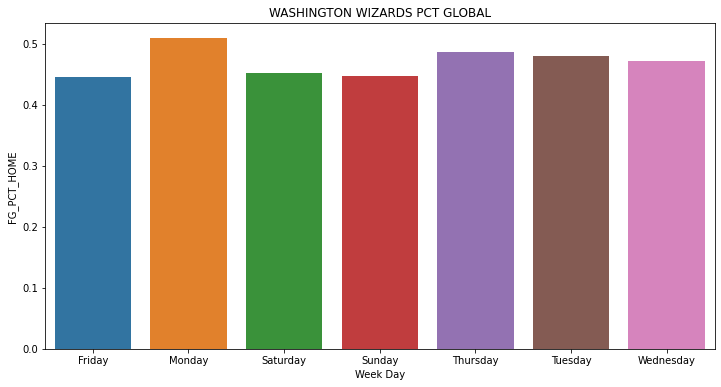

In [ ]:
# % GLOBAL AU SHOOT_HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_FG_PCT_HOME['day_of_week'], y= df_WAS_FG_PCT_HOME['FG_PCT_HOME'])
plt.title('WASHINGTON WIZARDS PCT GLOBAL')
plt.xlabel('Week Day')
plt.ylabel('FG_PCT_HOME')

In [ ]:
df_WAS_FG3_PCT_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['FG3_PCT_HOME'].mean())
df_WAS_FG3_PCT_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_FG3_PCT_HOME.sample(7)

,day_of_week,FG3_PCT_HOME
6,Wednesday,0.370273
3,Sunday,0.324100
4,Thursday,0.414200
2,Saturday,0.372818
0,Friday,0.321769
1,Monday,0.390571
5,Tuesday,0.340625


Text(0, 0.5, 'FG3_PCT_HOME')

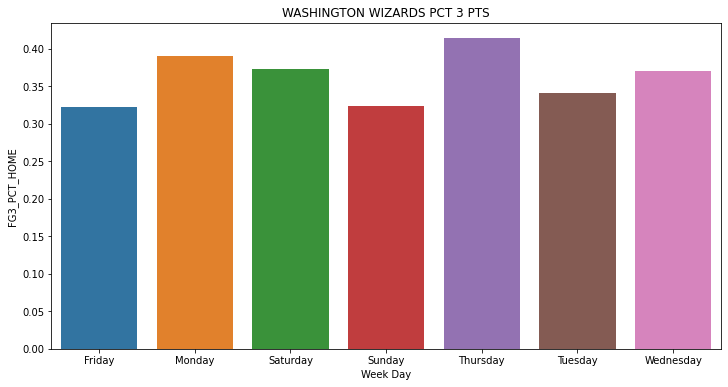

In [ ]:
# % 3 POINTS _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_FG3_PCT_HOME['day_of_week'], y= df_WAS_FG3_PCT_HOME['FG3_PCT_HOME'])
plt.title('WASHINGTON WIZARDS PCT 3 PTS')
plt.xlabel('Week Day')
plt.ylabel('FG3_PCT_HOME')

In [ ]:
df_WAS_FT_PCT_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['FT_PCT_HOME'].mean())
df_WAS_FT_PCT_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_FT_PCT_HOME.sample(7)

,day_of_week,FT_PCT_HOME
4,Thursday,0.804400
0,Friday,0.725000
5,Tuesday,0.794500
2,Saturday,0.758273
6,Wednesday,0.814636
1,Monday,0.716929
3,Sunday,0.818700


Text(0, 0.5, 'FT_PCT_HOME')

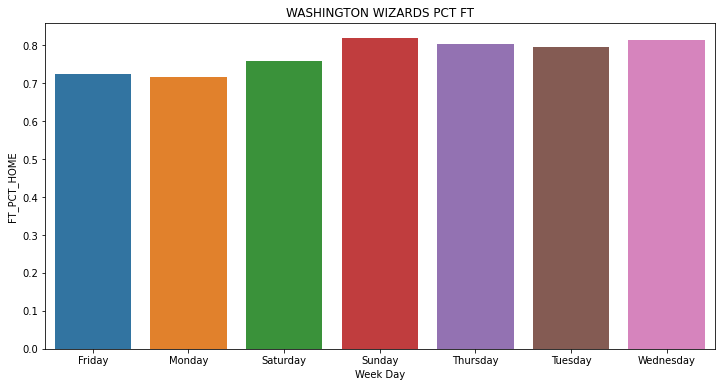

In [ ]:
# % LANCER FRANC _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_FT_PCT_HOME['day_of_week'], y= df_WAS_FT_PCT_HOME['FT_PCT_HOME'])
plt.title('WASHINGTON WIZARDS PCT FT')
plt.xlabel('Week Day')
plt.ylabel('FT_PCT_HOME')

In [ ]:
df_WAS_REB_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['REB_HOME'].mean())
df_WAS_REB_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_REB_HOME.sample(7)

,day_of_week,REB_HOME
1,Monday,44.071429
6,Wednesday,47.272727
2,Saturday,46.181818
3,Sunday,42.800000
0,Friday,43.384615
4,Thursday,43.800000
5,Tuesday,42.125000


Text(0, 0.5, 'REB_HOME')

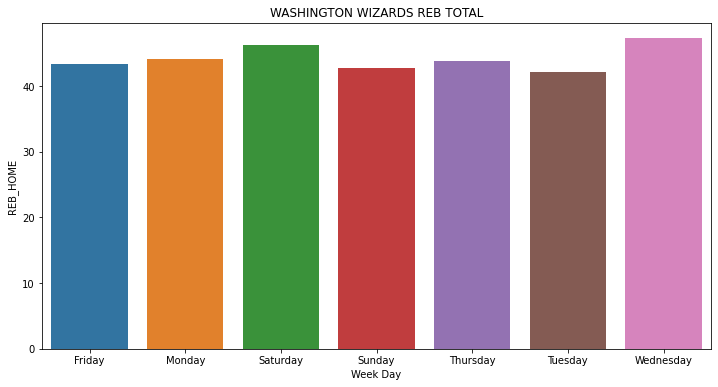

In [ ]:
# REB_HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_REB_HOME['day_of_week'], y= df_WAS_REB_HOME['REB_HOME'])
plt.title('WASHINGTON WIZARDS REB TOTAL')
plt.xlabel('Week Day')
plt.ylabel('REB_HOME')

In [ ]:
df_WAS_AST_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['AST_HOME'].mean())
df_WAS_AST_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_AST_HOME.sample(7)

,day_of_week,AST_HOME
3,Sunday,25.100000
5,Tuesday,25.375000
6,Wednesday,25.000000
0,Friday,22.923077
1,Monday,28.785714
2,Saturday,22.181818
4,Thursday,23.800000


Text(0, 0.5, 'AST_HOME')

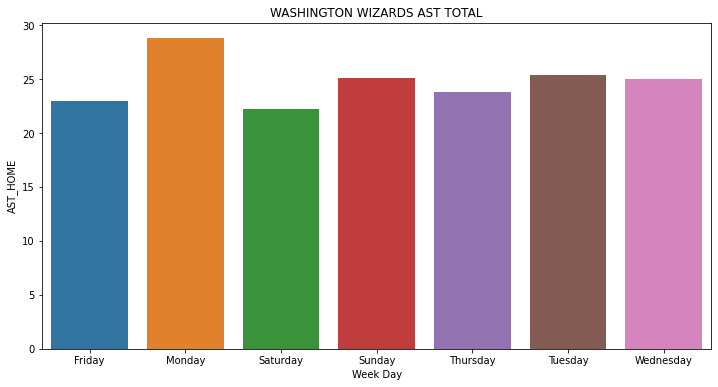

In [ ]:
# ASSIST / PASSE DEC _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_AST_HOME['day_of_week'], y= df_WAS_AST_HOME['AST_HOME'])
plt.title('WASHINGTON WIZARDS AST TOTAL')
plt.xlabel('Week Day')
plt.ylabel('AST_HOME')

In [ ]:
df_WAS_STL_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['STL_HOME'].mean())
df_WAS_STL_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_STL_HOME.sample(7)

,day_of_week,STL_HOME
6,Wednesday,7.000000
4,Thursday,7.600000
2,Saturday,8.272727
0,Friday,7.846154
3,Sunday,7.300000
1,Monday,7.714286
5,Tuesday,6.375000


Text(0, 0.5, 'STL_HOME')

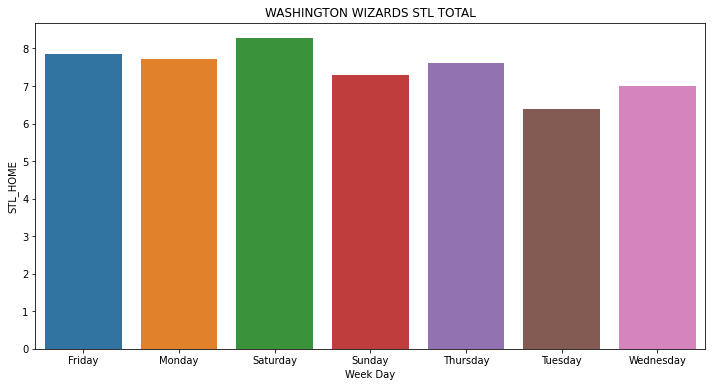

In [ ]:
# STEELS / INTERCEPTIONS _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_STL_HOME['day_of_week'], y=df_WAS_STL_HOME['STL_HOME'])
plt.title('WASHINGTON WIZARDS STL TOTAL')
plt.xlabel('Week Day')
plt.ylabel('STL_HOME')

In [ ]:
df_WAS_BLK_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['BLK_HOME'].mean())
df_WAS_BLK_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_BLK_HOME.sample(7)

,day_of_week,BLK_HOME
1,Monday,5.000000
6,Wednesday,4.000000
3,Sunday,3.300000
4,Thursday,3.200000
0,Friday,3.846154
5,Tuesday,3.875000
2,Saturday,4.363636


Text(0, 0.5, 'BLK_HOME')

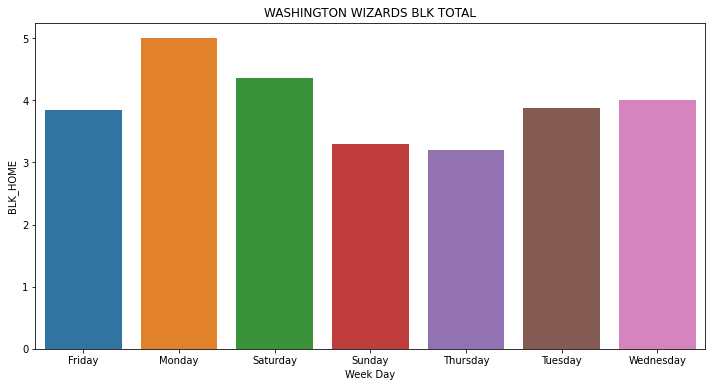

In [ ]:
# BLOCKED SHOTS / CONTRES _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_BLK_HOME['day_of_week'], y=df_WAS_BLK_HOME['BLK_HOME'])
plt.title('WASHINGTON WIZARDS BLK TOTAL')
plt.xlabel('Week Day')
plt.ylabel('BLK_HOME')

In [ ]:
df_WAS_TOV_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['TOV_HOME'].mean())
df_WAS_TOV_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_TOV_HOME.sample(7)

,day_of_week,TOV_HOME
3,Sunday,12.400000
6,Wednesday,15.545455
5,Tuesday,15.875000
4,Thursday,13.600000
2,Saturday,13.363636
1,Monday,13.571429
0,Friday,14.000000


Text(0, 0.5, 'TOV_HOME')

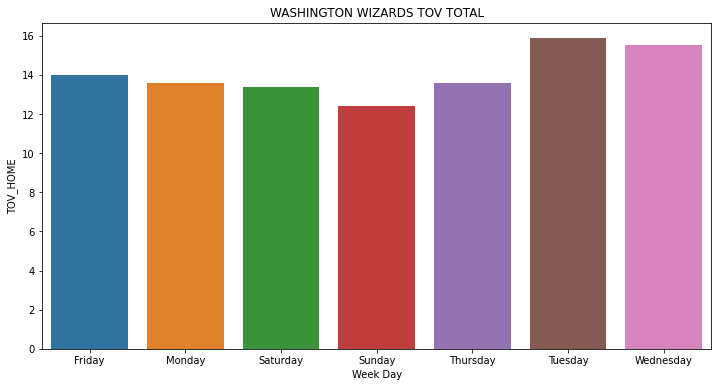

In [ ]:
# TURNOVER_HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_TOV_HOME['day_of_week'], y=df_WAS_TOV_HOME['TOV_HOME'])
plt.title('WASHINGTON WIZARDS TOV TOTAL')
plt.xlabel('Week Day')
plt.ylabel('TOV_HOME')

In [ ]:
df_WAS_PF_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['PF_HOME'].mean())
df_WAS_PF_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_PF_HOME.sample(7)

,day_of_week,PF_HOME
2,Saturday,22.545455
0,Friday,21.615385
3,Sunday,22.500000
1,Monday,22.500000
4,Thursday,24.000000
5,Tuesday,21.875000
6,Wednesday,22.090909


Text(0, 0.5, 'PF_HOME')

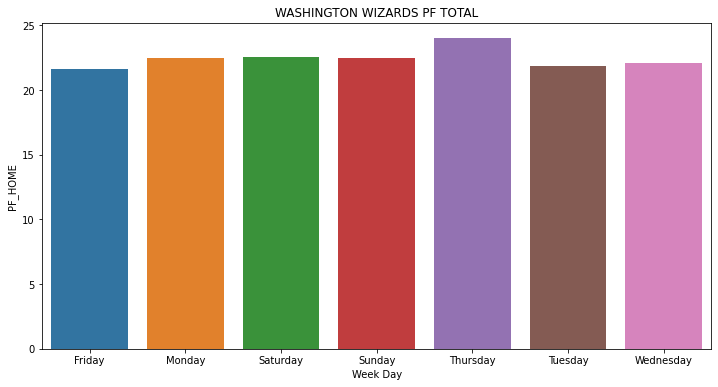

In [ ]:
# FAUTES PERSONELLES _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_PF_HOME['day_of_week'], y=df_WAS_PF_HOME['PF_HOME'])
plt.title('WASHINGTON WIZARDS PF TOTAL')
plt.xlabel('Week Day')
plt.ylabel('PF_HOME')

In [ ]:
df_WAS_PTS_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['PTS_HOME'].mean())
df_WAS_PTS_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_PTS_HOME.sample(7)

,day_of_week,PTS_HOME
6,Wednesday,119.272727
1,Monday,123.071429
4,Thursday,124.000000
0,Friday,109.615385
5,Tuesday,115.500000
2,Saturday,114.090909
3,Sunday,112.900000


Text(0, 0.5, 'PTS_HOME')

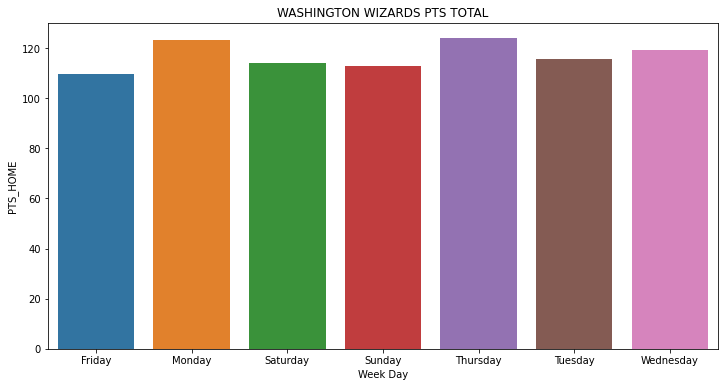

In [ ]:
# POINTS MARQUES _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_PTS_HOME['day_of_week'], y=df_WAS_PTS_HOME['PTS_HOME'])
plt.title('WASHINGTON WIZARDS PTS TOTAL')
plt.xlabel('Week Day')
plt.ylabel('PTS_HOME')

In [ ]:
df_WAS_PLUS_MINUS_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['PLUS_MINUS_HOME'].mean())
df_WAS_PLUS_MINUS_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_PLUS_MINUS_HOME.sample(7)

,day_of_week,PLUS_MINUS_HOME
4,Thursday,5.600000
2,Saturday,0.000000
0,Friday,-5.307692
3,Sunday,-2.900000
5,Tuesday,-5.500000
6,Wednesday,-2.818182
1,Monday,5.357143


Text(0, 0.5, 'PLUS_MINUS_HOME')

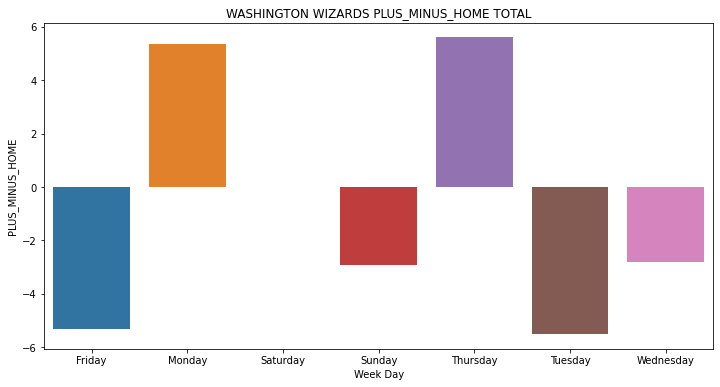

In [ ]:
# PLUS MINUS _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_PLUS_MINUS_HOME['day_of_week'], y=df_WAS_PLUS_MINUS_HOME['PLUS_MINUS_HOME'])
plt.title('WASHINGTON WIZARDS PLUS_MINUS_HOME TOTAL')
plt.xlabel('Week Day')
plt.ylabel('PLUS_MINUS_HOME')

In [ ]:
df_WAS_WL_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['WL_HOME'].mean())
df_WAS_WL_HOME.reset_index(inplace = True)
#df_WAS_FG3_PCT_HOME=df_WAS_FG3_PCT_HOME.sort_values(by=['FG3_PCT_HOME'], ascending=True)
df_WAS_WL_HOME.sample(7)

,day_of_week,WL_HOME
0,Friday,0.461538
3,Sunday,0.400000
4,Thursday,0.800000
2,Saturday,0.454545
5,Tuesday,0.250000
1,Monday,0.642857
6,Wednesday,0.454545


Text(0, 0.5, 'PLUS_MINUS_HOME')

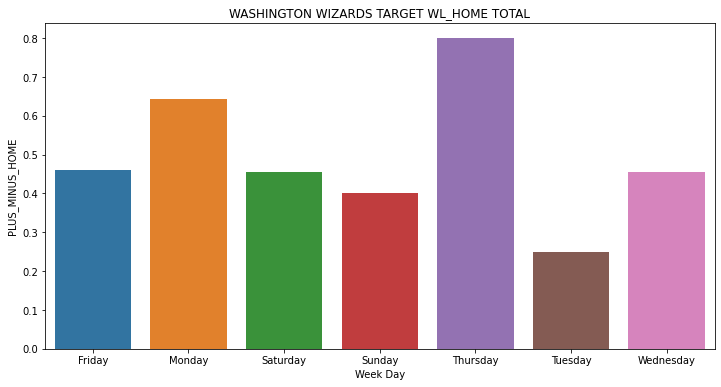

In [ ]:
# TARGET WL HOME _HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_WL_HOME['day_of_week'], y=df_WAS_WL_HOME['WL_HOME'])
plt.title('WASHINGTON WIZARDS TARGET WL_HOME TOTAL')
plt.xlabel('Week Day')
plt.ylabel('PLUS_MINUS_HOME')

In [ ]:
df_WAS_GLOBAL_HOME = pd.DataFrame(df_WAS.groupby(['day_of_week'])['WL_HOME','PLUS_MINUS_HOME','PTS_HOME','PF_HOME','TOV_HOME','BLK_HOME','STL_HOME','AST_HOME','REB_HOME','FT_PCT_HOME','FG3_PCT_HOME','FG_PCT_HOME'].mean())

In [ ]:
df_WAS_GLOBAL_HOME

,WL_HOME,PLUS_MINUS_HOME,PTS_HOME,PF_HOME,TOV_HOME,BLK_HOME,STL_HOME,AST_HOME,REB_HOME,FT_PCT_HOME,FG3_PCT_HOME,FG_PCT_HOME
day_of_week,,,,,,,,,,,,
Friday,0.461538,-5.307692,109.615385,21.615385,14.000000,3.846154,7.846154,22.923077,43.384615,0.725000,0.321769,0.444692
Monday,0.642857,5.357143,123.071429,22.500000,13.571429,5.000000,7.714286,28.785714,44.071429,0.716929,0.390571,0.509071
Saturday,0.454545,0.000000,114.090909,22.545455,13.363636,4.363636,8.272727,22.181818,46.181818,0.758273,0.372818,0.452636
Sunday,0.400000,-2.900000,112.900000,22.500000,12.400000,3.300000,7.300000,25.100000,42.800000,0.818700,0.324100,0.446900
Thursday,0.800000,5.600000,124.000000,24.000000,13.600000,3.200000,7.600000,23.800000,43.800000,0.804400,0.414200,0.487000
Tuesday,0.250000,-5.500000,115.500000,21.875000,15.875000,3.875000,6.375000,25.375000,42.125000,0.794500,0.340625,0.479875
Wednesday,0.454545,-2.818182,119.272727,22.090909,15.545455,4.000000,7.000000,25.000000,47.272727,0.814636,0.370273,0.472182


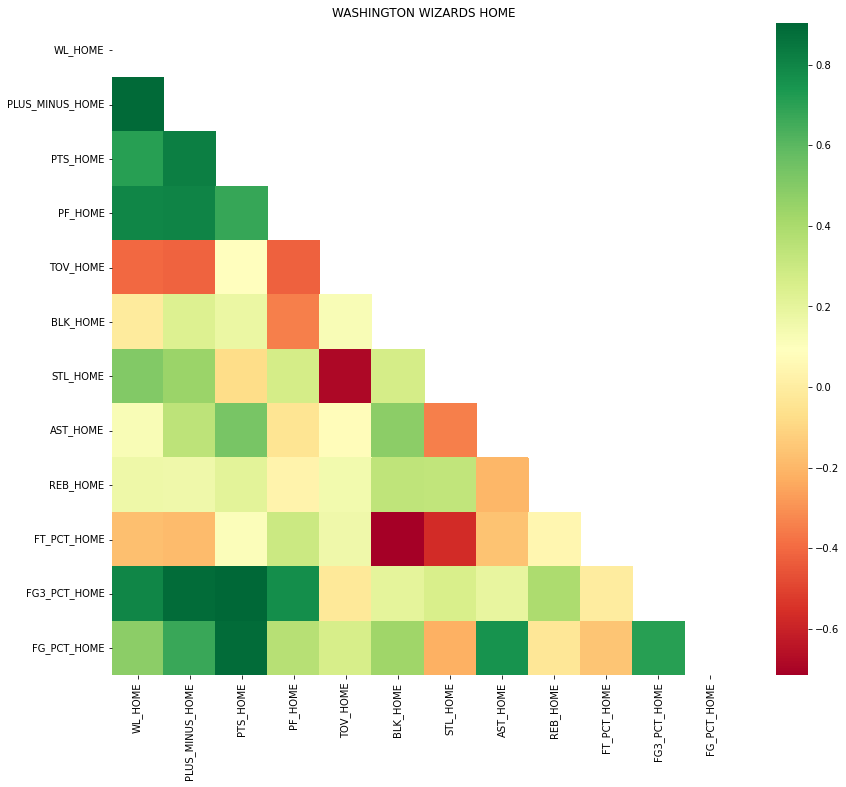

In [ ]:
plt.figure(figsize=(14,12))
matrice  =  np . triu ( df. corr ())
matrix = np.triu(df_WAS_GLOBAL_HOME.corr())
sns.heatmap(df_WAS_GLOBAL_HOME.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.title('WASHINGTON WIZARDS HOME')
plt.show();

In [ ]:
df_WAS_FG_PCT_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['FG_PCT_AWAY'].mean())
df_WAS_FG_PCT_AWAY.reset_index(inplace = True)
df_WAS_FG_PCT_AWAY.sample(7)

,day_of_week,FG_PCT_AWAY
3,Sunday,0.470800
6,Wednesday,0.467091
0,Friday,0.485692
4,Thursday,0.486000
5,Tuesday,0.484500
1,Monday,0.470929
2,Saturday,0.454818


Text(0, 0.5, 'FG_PCT_AWAY')

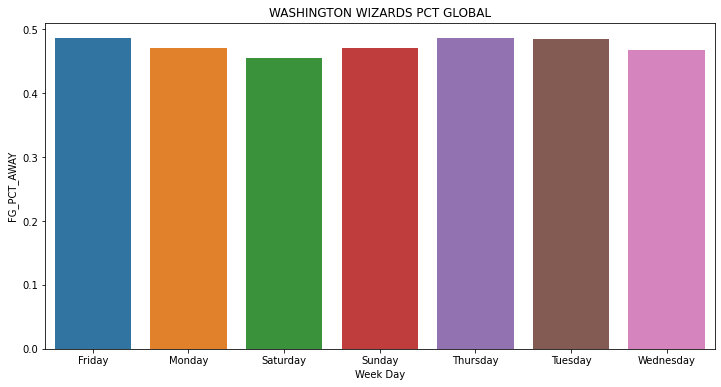

In [ ]:
# % GLOBAL AU SHOOT_HOME  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_FG_PCT_AWAY['day_of_week'], y= df_WAS_FG_PCT_AWAY['FG_PCT_AWAY'])
plt.title('WASHINGTON WIZARDS PCT GLOBAL')
plt.xlabel('Week Day')
plt.ylabel('FG_PCT_AWAY')

In [ ]:
df_WAS_FG3_PCT_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['FG3_PCT_AWAY'].mean())
df_WAS_FG3_PCT_AWAY.reset_index(inplace = True)
df_WAS_FG3_PCT_AWAY.sample(7)

,day_of_week,FG3_PCT_AWAY
0,Friday,0.328231
2,Saturday,0.342545
1,Monday,0.358429
6,Wednesday,0.372818
4,Thursday,0.397000
3,Sunday,0.350900
5,Tuesday,0.435375


Text(0, 0.5, 'FG3_PCT_AWAY')

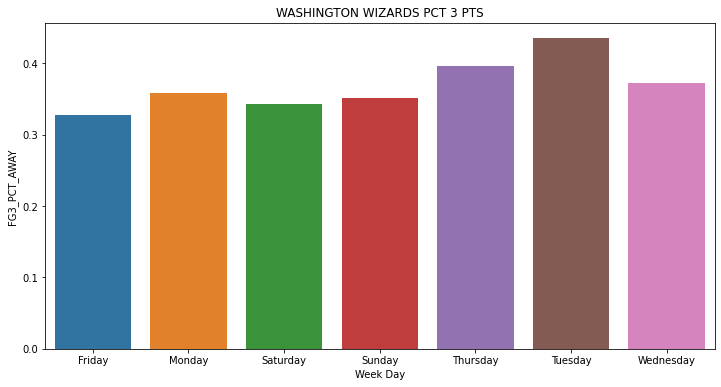

In [ ]:
# % 3 POINTS _AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_FG3_PCT_AWAY['day_of_week'], y= df_WAS_FG3_PCT_AWAY['FG3_PCT_AWAY'])
plt.title('WASHINGTON WIZARDS PCT 3 PTS')
plt.xlabel('Week Day')
plt.ylabel('FG3_PCT_AWAY')

In [ ]:
df_WAS_FT_PCT_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['FT_PCT_AWAY'].mean())
df_WAS_FT_PCT_AWAY.reset_index(inplace = True)
df_WAS_FT_PCT_AWAY.sample(7)

,day_of_week,FT_PCT_AWAY
2,Saturday,0.762545
1,Monday,0.809929
3,Sunday,0.796800
4,Thursday,0.727800
0,Friday,0.796692
6,Wednesday,0.781364
5,Tuesday,0.785750


Text(0, 0.5, 'FT_PCT_AWAY')

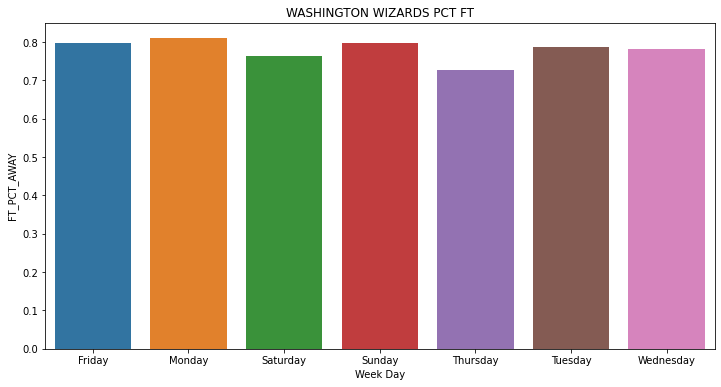

In [ ]:
# % LANCER FRANC _AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_FT_PCT_AWAY['day_of_week'], y= df_WAS_FT_PCT_AWAY['FT_PCT_AWAY'])
plt.title('WASHINGTON WIZARDS PCT FT')
plt.xlabel('Week Day')
plt.ylabel('FT_PCT_AWAY')

In [ ]:
df_WAS_REB_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['REB_AWAY'].mean())
df_WAS_REB_AWAY.reset_index(inplace = True)
df_WAS_REB_AWAY.sample(7)

,day_of_week,REB_AWAY
6,Wednesday,45.272727
0,Friday,47.615385
3,Sunday,45.500000
4,Thursday,43.600000
1,Monday,44.214286
2,Saturday,49.909091
5,Tuesday,44.500000


Text(0, 0.5, 'REB_AWAY')

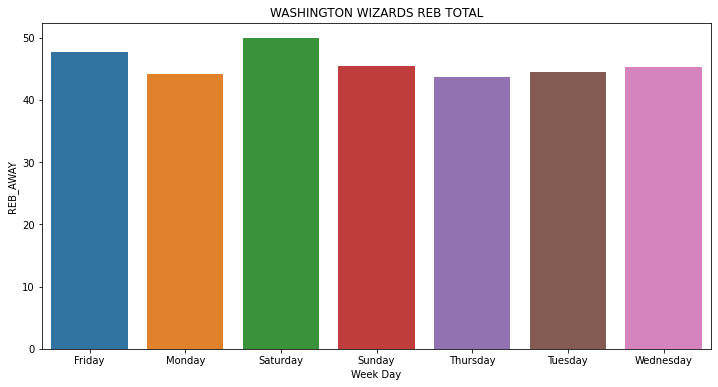

In [ ]:
# REB_AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_REB_AWAY['day_of_week'], y= df_WAS_REB_AWAY['REB_AWAY'])
plt.title('WASHINGTON WIZARDS REB TOTAL')
plt.xlabel('Week Day')
plt.ylabel('REB_AWAY')

In [ ]:
df_WAS_AST_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['AST_AWAY'].mean())
df_WAS_AST_AWAY.reset_index(inplace = True)
df_WAS_AST_AWAY.sample(7)

,day_of_week,AST_AWAY
6,Wednesday,26.090909
5,Tuesday,25.125000
1,Monday,23.928571
2,Saturday,24.454545
3,Sunday,23.200000
4,Thursday,26.800000
0,Friday,22.384615


Text(0, 0.5, 'AST_AWAY')

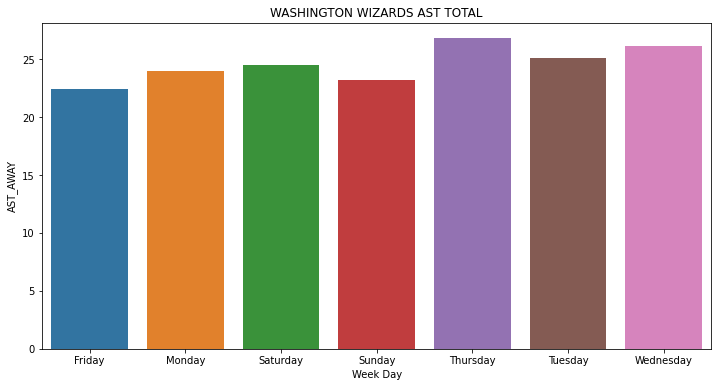

In [ ]:
# ASSIST / PASSE DEC _AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x= df_WAS_AST_AWAY['day_of_week'], y= df_WAS_AST_AWAY['AST_AWAY'])
plt.title('WASHINGTON WIZARDS AST TOTAL')
plt.xlabel('Week Day')
plt.ylabel('AST_AWAY')

In [ ]:
df_WAS_STL_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['STL_AWAY'].mean())
df_WAS_STL_AWAY.reset_index(inplace = True)
df_WAS_STL_AWAY.sample(7)

,day_of_week,STL_AWAY
6,Wednesday,9.454545
5,Tuesday,7.750000
0,Friday,7.923077
1,Monday,6.857143
4,Thursday,7.800000
2,Saturday,7.000000
3,Sunday,6.400000


Text(0, 0.5, 'STL_AWAY')

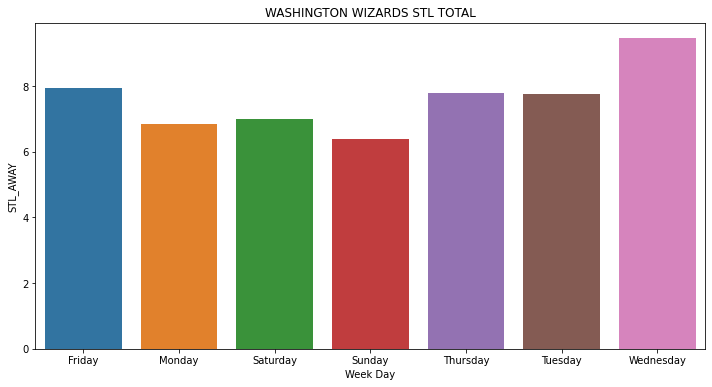

In [ ]:
# STEELS / INTERCEPTIONS _AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_STL_AWAY['day_of_week'], y=df_WAS_STL_AWAY['STL_AWAY'])
plt.title('WASHINGTON WIZARDS STL TOTAL')
plt.xlabel('Week Day')
plt.ylabel('STL_AWAY')

In [ ]:
df_WAS_BLK_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['BLK_HOME'].mean())
df_WAS_BLK_AWAY.reset_index(inplace = True)
df_WAS_BLK_AWAY.sample(7)

,day_of_week,BLK_HOME
1,Monday,5.000000
4,Thursday,3.200000
5,Tuesday,3.875000
2,Saturday,4.363636
6,Wednesday,4.000000
0,Friday,3.846154
3,Sunday,3.300000


Text(0, 0.5, 'BLK_AWAY')

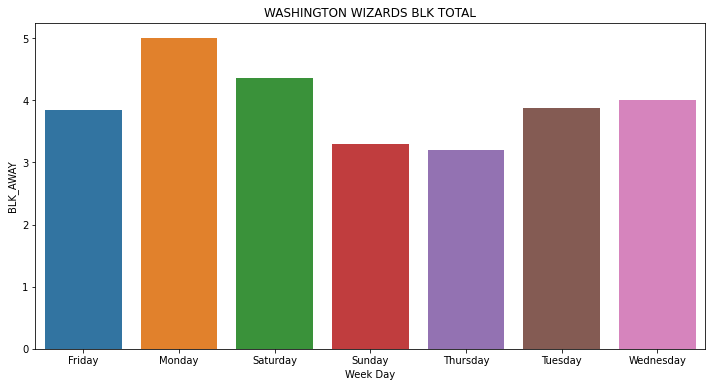

In [ ]:
# BLOCKED SHOTS / CONTRES _AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_BLK_AWAY['day_of_week'], y=df_WAS_BLK_AWAY['BLK_HOME'])
plt.title('WASHINGTON WIZARDS BLK TOTAL')
plt.xlabel('Week Day')
plt.ylabel('BLK_AWAY')

In [ ]:
df_WAS_TOV_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['TOV_AWAY'].mean())
df_WAS_TOV_AWAY.reset_index(inplace = True)
df_WAS_TOV_AWAY.sample(7)

,day_of_week,TOV_AWAY
1,Monday,15.357143
4,Thursday,16.600000
6,Wednesday,13.000000
0,Friday,15.461538
3,Sunday,15.100000
5,Tuesday,14.875000
2,Saturday,16.636364


Text(0, 0.5, 'TOV_AWAY')

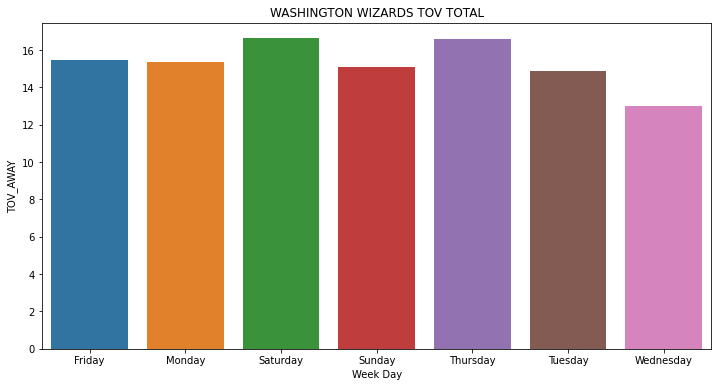

In [ ]:
# TURNOVER_AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_TOV_AWAY['day_of_week'], y=df_WAS_TOV_AWAY['TOV_AWAY'])
plt.title('WASHINGTON WIZARDS TOV TOTAL')
plt.xlabel('Week Day')
plt.ylabel('TOV_AWAY')

In [ ]:
df_WAS_PF_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['PF_AWAY'].mean())
df_WAS_PF_AWAY.reset_index(inplace = True)
df_WAS_PF_AWAY.sample(7)

,day_of_week,PF_AWAY
5,Tuesday,21.875000
0,Friday,22.307692
4,Thursday,26.600000
1,Monday,21.000000
2,Saturday,22.363636
6,Wednesday,21.727273
3,Sunday,21.400000


Text(0, 0.5, 'PF_AWAY')

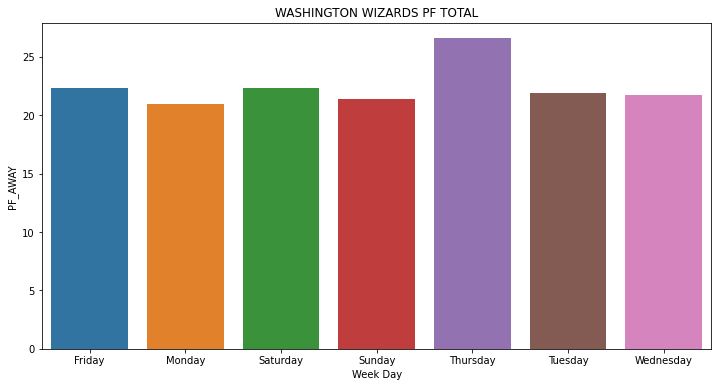

In [ ]:
# FAUTES PERSONELLES _AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_PF_AWAY['day_of_week'], y=df_WAS_PF_AWAY['PF_AWAY'])
plt.title('WASHINGTON WIZARDS PF TOTAL')
plt.xlabel('Week Day')
plt.ylabel('PF_AWAY')

In [ ]:
df_WAS_PTS_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['PTS_AWAY'].mean())
df_WAS_PTS_AWAY.reset_index(inplace = True)
df_WAS_PTS_AWAY.sample(7)

,day_of_week,PTS_AWAY
1,Monday,117.714286
6,Wednesday,122.090909
4,Thursday,118.400000
0,Friday,114.923077
2,Saturday,114.090909
5,Tuesday,121.000000
3,Sunday,115.800000


Text(0, 0.5, 'PTS_AWAY')

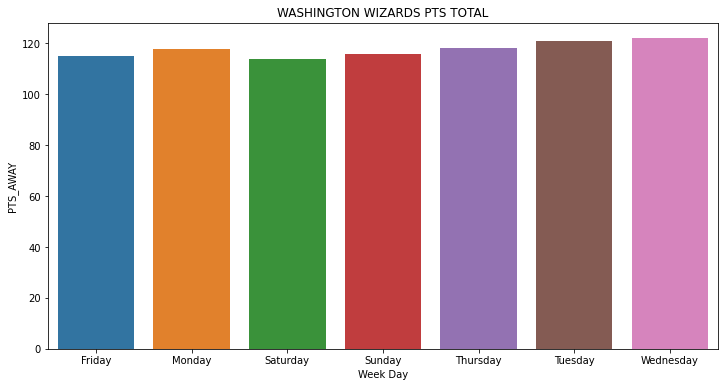

In [ ]:
# POINTS MARQUES _AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_PTS_AWAY['day_of_week'], y=df_WAS_PTS_AWAY['PTS_AWAY'])
plt.title('WASHINGTON WIZARDS PTS TOTAL')
plt.xlabel('Week Day')
plt.ylabel('PTS_AWAY')

In [ ]:
df_WAS_PLUS_MINUS_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['PLUS_MINUS_AWAY'].mean())
df_WAS_PLUS_MINUS_AWAY.reset_index(inplace = True)
df_WAS_PLUS_MINUS_AWAY.sample(7)

,day_of_week,PLUS_MINUS_AWAY
1,Monday,-5.357143
4,Thursday,-5.600000
2,Saturday,0.000000
6,Wednesday,2.818182
3,Sunday,2.900000
5,Tuesday,5.500000
0,Friday,5.307692


Text(0, 0.5, 'PLUS_MINUS_AWAY')

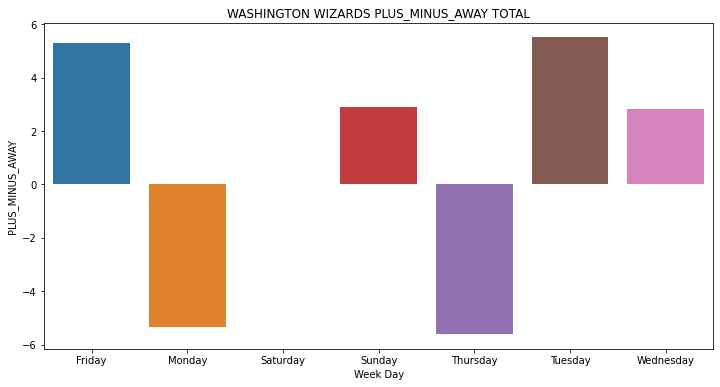

In [ ]:
# PLUS MINUS _AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_PLUS_MINUS_AWAY['day_of_week'], y=df_WAS_PLUS_MINUS_AWAY['PLUS_MINUS_AWAY'])
plt.title('WASHINGTON WIZARDS PLUS_MINUS_AWAY TOTAL')
plt.xlabel('Week Day')
plt.ylabel('PLUS_MINUS_AWAY')

In [ ]:
df_WAS_WL_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['WL_AWAY'].mean())
df_WAS_WL_AWAY.reset_index(inplace = True)
df_WAS_WL_AWAY.sample(7)

,day_of_week,WL_AWAY
2,Saturday,0.545455
5,Tuesday,0.750000
4,Thursday,0.200000
6,Wednesday,0.545455
1,Monday,0.357143
0,Friday,0.538462
3,Sunday,0.600000


Text(0, 0.5, 'PLUS_MINUS_AWAY')

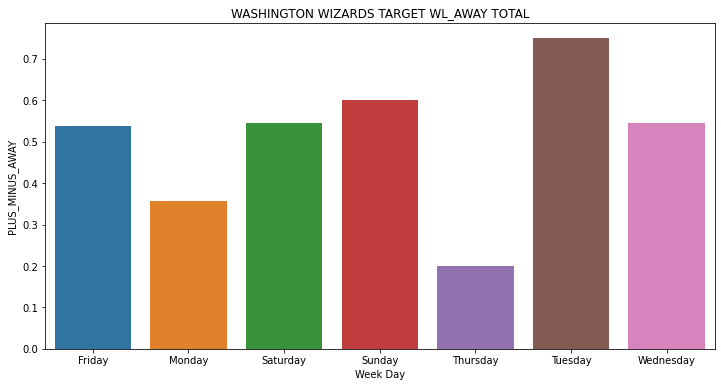

In [ ]:
# TARGET WL AWAY  vs WEEKDAY
plt.figure(figsize=(12, 6))
sns.barplot(x=df_WAS_WL_AWAY['day_of_week'], y=df_WAS_WL_AWAY['WL_AWAY'])
plt.title('WASHINGTON WIZARDS TARGET WL_AWAY TOTAL')
plt.xlabel('Week Day')
plt.ylabel('PLUS_MINUS_AWAY')

In [ ]:
df_WAS_GLOBAL_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['WL_AWAY','PLUS_MINUS_AWAY','PTS_AWAY','PF_AWAY','TOV_AWAY','BLK_AWAY','STL_AWAY','AST_AWAY','REB_AWAY','FT_PCT_AWAY','FG3_PCT_AWAY','FG_PCT_AWAY'].mean())

In [ ]:
df_WAS_GLOBAL_AWAY

,WL_AWAY,PLUS_MINUS_AWAY,PTS_AWAY,PF_AWAY,TOV_AWAY,BLK_AWAY,STL_AWAY,AST_AWAY,REB_AWAY,FT_PCT_AWAY,FG3_PCT_AWAY,FG_PCT_AWAY
day_of_week,,,,,,,,,,,,
Friday,0.538462,5.307692,114.923077,22.307692,15.461538,5.000000,7.923077,22.384615,47.615385,0.796692,0.328231,0.485692
Monday,0.357143,-5.357143,117.714286,21.000000,15.357143,5.357143,6.857143,23.928571,44.214286,0.809929,0.358429,0.470929
Saturday,0.545455,0.000000,114.090909,22.363636,16.636364,5.181818,7.000000,24.454545,49.909091,0.762545,0.342545,0.454818
Sunday,0.600000,2.900000,115.800000,21.400000,15.100000,4.200000,6.400000,23.200000,45.500000,0.796800,0.350900,0.470800
Thursday,0.200000,-5.600000,118.400000,26.600000,16.600000,4.000000,7.800000,26.800000,43.600000,0.727800,0.397000,0.486000
Tuesday,0.750000,5.500000,121.000000,21.875000,14.875000,2.500000,7.750000,25.125000,44.500000,0.785750,0.435375,0.484500
Wednesday,0.545455,2.818182,122.090909,21.727273,13.000000,5.363636,9.454545,26.090909,45.272727,0.781364,0.372818,0.467091


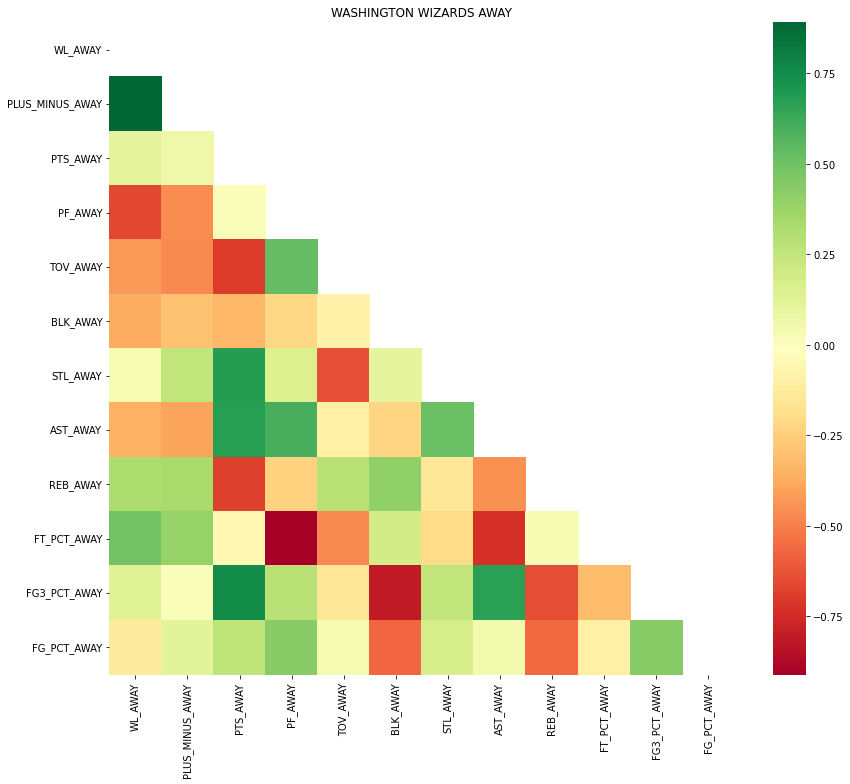

In [ ]:
plt.figure(figsize=(14,12))
matrice  =  np . triu ( df. corr ())
matrix = np.triu(df_WAS_GLOBAL_AWAY.corr())
sns.heatmap(df_WAS_GLOBAL_AWAY.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.title('WASHINGTON WIZARDS AWAY')
plt.show();

In [ ]:
# COMPILATION & COMPARAISON DES DONNEES HOME + AWAY
df_WAS_GLOBAL_HOME_AWAY = pd.DataFrame(df_WAS.groupby(['day_of_week'])['WL_HOME','WL_AWAY','PLUS_MINUS_HOME','PLUS_MINUS_AWAY','PTS_HOME','PTS_AWAY','PF_HOME','PF_AWAY','TOV_HOME','TOV_AWAY','BLK_HOME','BLK_AWAY','STL_HOME','STL_AWAY', 'AST_HOME','AST_AWAY','REB_HOME','REB_AWAY','FT_PCT_HOME','FT_PCT_AWAY','FG3_PCT_HOME','FG3_PCT_AWAY','FG_PCT_HOME','FG_PCT_AWAY'].mean()).reset_index()

In [ ]:
df_WAS_GLOBAL_HOME_AWAY.head()

,day_of_week,WL_HOME,WL_AWAY,PLUS_MINUS_HOME,PLUS_MINUS_AWAY,PTS_HOME,PTS_AWAY,PF_HOME,PF_AWAY,TOV_HOME,TOV_AWAY,BLK_HOME,BLK_AWAY,STL_HOME,STL_AWAY,AST_HOME,AST_AWAY,REB_HOME,REB_AWAY,FT_PCT_HOME,FT_PCT_AWAY,FG3_PCT_HOME,FG3_PCT_AWAY,FG_PCT_HOME,FG_PCT_AWAY
0,Friday,0.461538,0.538462,-5.307692,5.307692,109.615385,114.923077,21.615385,22.307692,14.000000,15.461538,3.846154,5.000000,7.846154,7.923077,22.923077,22.384615,43.384615,47.615385,0.725000,0.796692,0.321769,0.328231,0.444692,0.485692
1,Monday,0.642857,0.357143,5.357143,-5.357143,123.071429,117.714286,22.500000,21.000000,13.571429,15.357143,5.000000,5.357143,7.714286,6.857143,28.785714,23.928571,44.071429,44.214286,0.716929,0.809929,0.390571,0.358429,0.509071,0.470929
2,Saturday,0.454545,0.545455,0.000000,0.000000,114.090909,114.090909,22.545455,22.363636,13.363636,16.636364,4.363636,5.181818,8.272727,7.000000,22.181818,24.454545,46.181818,49.909091,0.758273,0.762545,0.372818,0.342545,0.452636,0.454818
3,Sunday,0.400000,0.600000,-2.900000,2.900000,112.900000,115.800000,22.500000,21.400000,12.400000,15.100000,3.300000,4.200000,7.300000,6.400000,25.100000,23.200000,42.800000,45.500000,0.818700,0.796800,0.324100,0.350900,0.446900,0.470800
4,Thursday,0.800000,0.200000,5.600000,-5.600000,124.000000,118.400000,24.000000,26.600000,13.600000,16.600000,3.200000,4.000000,7.600000,7.800000,23.800000,26.800000,43.800000,43.600000,0.804400,0.727800,0.414200,0.397000,0.487000,0.486000


In [ ]:
df_WAS_GLOBAL_HOME_AWAY['victory_rate'] = ((df_WAS_GLOBAL_HOME_AWAY['WL_HOME']/df_WAS_GLOBAL_HOME_AWAY['WL_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_PLUS_MINUS'] = ((df_WAS_GLOBAL_HOME_AWAY['PLUS_MINUS_HOME']/df_WAS_GLOBAL_HOME_AWAY['PLUS_MINUS_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_PTS'] = ((df_WAS_GLOBAL_HOME_AWAY['PTS_HOME']/df_WAS_GLOBAL_HOME_AWAY['PTS_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_PF'] = ((df_WAS_GLOBAL_HOME_AWAY['PF_HOME']/df_WAS_GLOBAL_HOME_AWAY['PF_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_TOV'] = ((df_WAS_GLOBAL_HOME_AWAY['TOV_HOME']/df_WAS_GLOBAL_HOME_AWAY['TOV_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_BLK'] = ((df_WAS_GLOBAL_HOME_AWAY['BLK_HOME']/df_WAS_GLOBAL_HOME_AWAY['BLK_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_STL'] = ((df_WAS_GLOBAL_HOME_AWAY['STL_HOME']/df_WAS_GLOBAL_HOME_AWAY['STL_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_AST'] = ((df_WAS_GLOBAL_HOME_AWAY['AST_HOME']/df_WAS_GLOBAL_HOME_AWAY['AST_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_REB'] = ((df_WAS_GLOBAL_HOME_AWAY['REB_HOME']/df_WAS_GLOBAL_HOME_AWAY['REB_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_FT_PCT'] = ((df_WAS_GLOBAL_HOME_AWAY['FT_PCT_HOME']/df_WAS_GLOBAL_HOME_AWAY['FT_PCT_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_FG3_PCT'] = ((df_WAS_GLOBAL_HOME_AWAY['FG3_PCT_HOME']/df_WAS_GLOBAL_HOME_AWAY['FG3_PCT_AWAY'])-1)*100
df_WAS_GLOBAL_HOME_AWAY['delta_FG_PCT'] = ((df_WAS_GLOBAL_HOME_AWAY['FG_PCT_HOME']/df_WAS_GLOBAL_HOME_AWAY['FG_PCT_AWAY'])-1)*100

In [ ]:
df_WAS_GLOBAL_HOME_AWAY.head()

,day_of_week,WL_HOME,WL_AWAY,PLUS_MINUS_HOME,PLUS_MINUS_AWAY,PTS_HOME,PTS_AWAY,PF_HOME,PF_AWAY,TOV_HOME,TOV_AWAY,BLK_HOME,BLK_AWAY,STL_HOME,STL_AWAY,AST_HOME,AST_AWAY,REB_HOME,REB_AWAY,FT_PCT_HOME,FT_PCT_AWAY,FG3_PCT_HOME,FG3_PCT_AWAY,FG_PCT_HOME,FG_PCT_AWAY,victory_rate,delta_PLUS_MINUS,delta_PTS,delta_PF,delta_TOV,delta_BLK,delta_STL,delta_AST,delta_REB,delta_FT_PCT,delta_FG3_PCT,delta_FG_PCT
0,Friday,0.461538,0.538462,-5.307692,5.307692,109.615385,114.923077,21.615385,22.307692,14.000000,15.461538,3.846154,5.000000,7.846154,7.923077,22.923077,22.384615,43.384615,47.615385,0.725000,0.796692,0.321769,0.328231,0.444692,0.485692,-14.285714,-200.0,-4.618474,-3.103448,-9.452736,-23.076923,-0.970874,2.405498,-8.885299,-8.998745,-1.968596,-8.441558
1,Monday,0.642857,0.357143,5.357143,-5.357143,123.071429,117.714286,22.500000,21.000000,13.571429,15.357143,5.000000,5.357143,7.714286,6.857143,28.785714,23.928571,44.071429,44.214286,0.716929,0.809929,0.390571,0.358429,0.509071,0.470929,80.000000,-200.0,4.550971,7.142857,-11.627907,-6.666667,12.500000,20.298507,-0.323102,-11.482494,8.967716,8.099499
2,Saturday,0.454545,0.545455,0.000000,0.000000,114.090909,114.090909,22.545455,22.363636,13.363636,16.636364,4.363636,5.181818,8.272727,7.000000,22.181818,24.454545,46.181818,49.909091,0.758273,0.762545,0.372818,0.342545,0.452636,0.454818,-16.666667,NaN,0.000000,0.813008,-19.672131,-15.789474,18.181818,-9.293680,-7.468124,-0.560324,8.837580,-0.479712
3,Sunday,0.400000,0.600000,-2.900000,2.900000,112.900000,115.800000,22.500000,21.400000,12.400000,15.100000,3.300000,4.200000,7.300000,6.400000,25.100000,23.200000,42.800000,45.500000,0.818700,0.796800,0.324100,0.350900,0.446900,0.470800,-33.333333,-200.0,-2.504318,5.140187,-17.880795,-21.428571,14.062500,8.189655,-5.934066,2.748494,-7.637504,-5.076466
4,Thursday,0.800000,0.200000,5.600000,-5.600000,124.000000,118.400000,24.000000,26.600000,13.600000,16.600000,3.200000,4.000000,7.600000,7.800000,23.800000,26.800000,43.800000,43.600000,0.804400,0.727800,0.414200,0.397000,0.487000,0.486000,300.000000,-200.0,4.729730,-9.774436,-18.072289,-20.000000,-2.564103,-11.194030,0.458716,10.524869,4.332494,0.205761


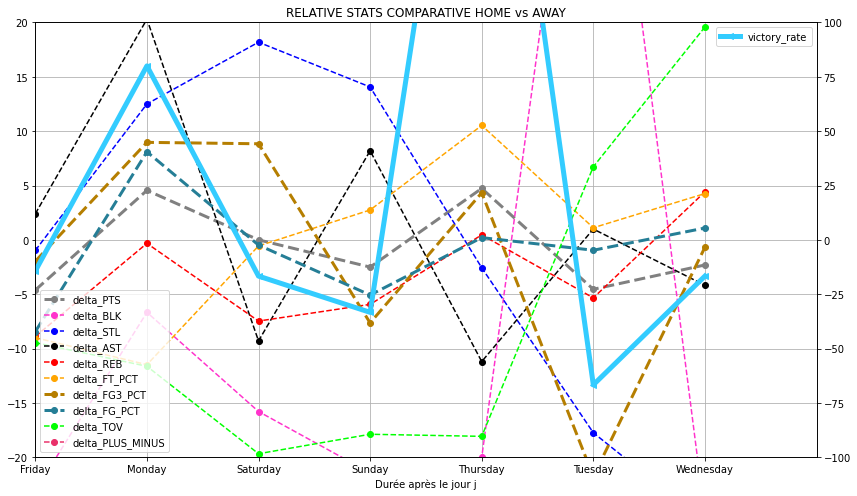

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
s1 = df_WAS_GLOBAL_HOME_AWAY['victory_rate']
s2 = df_WAS_GLOBAL_HOME_AWAY['delta_PTS']
s3 = df_WAS_GLOBAL_HOME_AWAY['delta_BLK']
s4 = df_WAS_GLOBAL_HOME_AWAY['delta_STL']
s5 = df_WAS_GLOBAL_HOME_AWAY['delta_AST']
s6 = df_WAS_GLOBAL_HOME_AWAY['delta_REB']
s7 = df_WAS_GLOBAL_HOME_AWAY['delta_FT_PCT']
s8 = df_WAS_GLOBAL_HOME_AWAY['delta_FG3_PCT']
s9 = df_WAS_GLOBAL_HOME_AWAY['delta_FG_PCT']
s10 = df_WAS_GLOBAL_HOME_AWAY['delta_TOV']
s11 = df_WAS_GLOBAL_HOME_AWAY['delta_PLUS_MINUS']
ax1.grid(True)
ax1.plot(s2,color='gray',marker='o',linestyle='--',linewidth=3, label='delta_PTS')
ax1.plot(s3,color='#FF33CC',marker='o',linestyle='--', label='delta_BLK')
ax1.plot(s4,color='blue',marker='o',linestyle='--',label='delta_STL')
ax1.plot(s5,color='black',marker='o',linestyle='--',label='delta_AST')
ax1.plot(s6,color='red',marker='o',linestyle='--',label='delta_REB')
ax1.plot(s7,color='orange',marker='o',linestyle='--', label='delta_FT_PCT')
ax1.plot(s8,color='#b57e00',marker='o',linestyle='--',linewidth=3, label='delta_FG3_PCT')
ax1.plot(s9,color='#257e96',marker='o',linestyle='--',linewidth=3, label='delta_FG_PCT')
ax1.plot(s10,color='lime',marker='o',linestyle='--', label='delta_TOV')
ax1.plot(s11,color='#e9316a',marker='o',linestyle='--', label='delta_PLUS_MINUS')
ax2 = ax1.twinx()
ax2.plot(s1,color='#33CCFF',marker='<',linestyle='-',linewidth=5, label='victory_rate')
ax1.set_xlim([0,7])
ax1.set_ylim([-20,20])
ax2.set_xlim([0,7])
ax2.set_ylim([-100,100])
ax1.set_title('RELATIVE STATS COMPARATIVE HOME vs AWAY')
ax1.set_xticks(range(0,7,1))
ax1.set_xticklabels(df_WAS_GLOBAL_HOME_AWAY['day_of_week'])
#ax1.set_xticklabels(["j +" + str(l) for l in range(0,7,1)])
ax1.set_xlabel('Durée après le jour j')
ax1.legend(loc='lower left')
ax2.legend(loc='best')


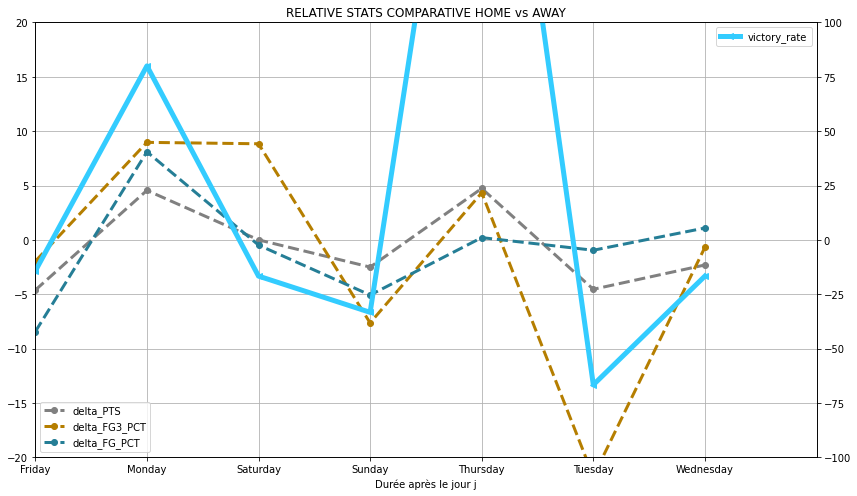

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
s1 = df_WAS_GLOBAL_HOME_AWAY['victory_rate']
s2 = df_WAS_GLOBAL_HOME_AWAY['delta_PTS']
s3 = df_WAS_GLOBAL_HOME_AWAY['delta_BLK']
s4 = df_WAS_GLOBAL_HOME_AWAY['delta_STL']
s5 = df_WAS_GLOBAL_HOME_AWAY['delta_AST']
s6 = df_WAS_GLOBAL_HOME_AWAY['delta_REB']
s7 = df_WAS_GLOBAL_HOME_AWAY['delta_FT_PCT']
s8 = df_WAS_GLOBAL_HOME_AWAY['delta_FG3_PCT']
s9 = df_WAS_GLOBAL_HOME_AWAY['delta_FG_PCT']
s10 = df_WAS_GLOBAL_HOME_AWAY['delta_TOV']
s11 = df_WAS_GLOBAL_HOME_AWAY['delta_PLUS_MINUS']
ax1.grid(True)
ax1.plot(s2,color='gray',marker='o',linestyle='--',linewidth=3, label='delta_PTS')
ax1.plot(s8,color='#b57e00',marker='o',linestyle='--',linewidth=3, label='delta_FG3_PCT')
ax1.plot(s9,color='#257e96',marker='o',linestyle='--',linewidth=3, label='delta_FG_PCT')
ax2 = ax1.twinx()
ax2.plot(s1,color='#33CCFF',marker='<',linestyle='-',linewidth=5, label='victory_rate')
ax1.set_xlim([0,7])
ax1.set_ylim([-20,20])
ax2.set_xlim([0,7])
ax2.set_ylim([-100,100])
ax1.set_title('RELATIVE STATS COMPARATIVE HOME vs AWAY')
ax1.set_xticks(range(0,7,1))
ax1.set_xticklabels(df_WAS_GLOBAL_HOME_AWAY['day_of_week'])
#ax1.set_xticklabels(["j +" + str(l) for l in range(0,7,1)])
ax1.set_xlabel('Durée après le jour j')
ax1.legend(loc='lower left')
ax2.legend(loc='best')

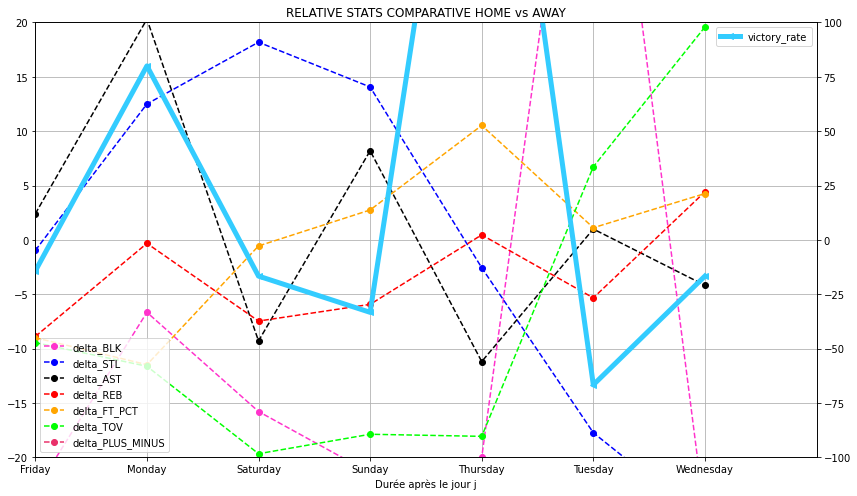

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
s1 = df_WAS_GLOBAL_HOME_AWAY['victory_rate']
s2 = df_WAS_GLOBAL_HOME_AWAY['delta_PTS']
s3 = df_WAS_GLOBAL_HOME_AWAY['delta_BLK']
s4 = df_WAS_GLOBAL_HOME_AWAY['delta_STL']
s5 = df_WAS_GLOBAL_HOME_AWAY['delta_AST']
s6 = df_WAS_GLOBAL_HOME_AWAY['delta_REB']
s7 = df_WAS_GLOBAL_HOME_AWAY['delta_FT_PCT']
s8 = df_WAS_GLOBAL_HOME_AWAY['delta_FG3_PCT']
s9 = df_WAS_GLOBAL_HOME_AWAY['delta_FG_PCT']
s10 = df_WAS_GLOBAL_HOME_AWAY['delta_TOV']
s11 = df_WAS_GLOBAL_HOME_AWAY['delta_PLUS_MINUS']
ax1.plot(s3,color='#FF33CC',marker='o',linestyle='--', label='delta_BLK')
ax1.plot(s4,color='blue',marker='o',linestyle='--',label='delta_STL')
ax1.plot(s5,color='black',marker='o',linestyle='--',label='delta_AST')
ax1.plot(s6,color='red',marker='o',linestyle='--',label='delta_REB')
ax1.plot(s7,color='orange',marker='o',linestyle='--', label='delta_FT_PCT')
ax1.plot(s10,color='lime',marker='o',linestyle='--', label='delta_TOV')
ax1.plot(s11,color='#e9316a',marker='o',linestyle='--', label='delta_PLUS_MINUS')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(s1,color='#33CCFF',marker='<',linestyle='-',linewidth=5, label='victory_rate')
ax1.set_xlim([0,7])
ax1.set_ylim([-20,20])
ax2.set_xlim([0,7])
ax2.set_ylim([-100,100])
ax1.set_title('RELATIVE STATS COMPARATIVE HOME vs AWAY')
ax1.set_xticks(range(0,7,1))
ax1.set_xticklabels(df_WAS_GLOBAL_HOME_AWAY['day_of_week'])
#ax1.set_xticklabels(["j +" + str(l) for l in range(0,7,1)])
ax1.set_xlabel('Durée après le jour j')
ax1.legend(loc='lower left')
ax2.legend(loc='best')